In [57]:
import pandas as pd



In [58]:
file_name = "/workspaces/codex-analysis/0-phenocycler-penntmc-pipeline/out/output_dev/patches_metadata.csv"
patch_metadata = pd.read_csv(file_name)
patch_metadata.head(20)

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc
0,0,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,1440,1920,0.000000,0.000000,0.000000,0.003621,0.158817,0.000557
6,6,1440,1920,1.123402,1.035973,0.884536,0.250013,1.904538,0.055420
7,7,1440,1920,4.388422,3.284918,0.988349,0.119828,0.775899,0.061963
8,8,1440,1920,6.069073,3.507168,0.998627,0.411727,2.703638,0.079941
9,9,1440,1920,5.156181,4.108016,0.997407,1.113294,4.312980,0.178838


In [82]:
# First QC condition
non_zero_perc_threshold_1 = 0.05
mean_intensity_threshold_1 = 1
std_intensity_threshold_1 = 0.1

patch_metadata["is_empty_1"] = (
    patch_metadata["nuclear_non_zero_perc"] < non_zero_perc_threshold_1
)

patch_metadata["is_noisy_1"] = (
    patch_metadata["nuclear_mean"] < mean_intensity_threshold_1
) | (patch_metadata["nuclear_std"] < std_intensity_threshold_1)

patch_metadata["is_bad_patch_1"] = (
    patch_metadata["is_empty_1"] | patch_metadata["is_noisy_1"]
)

print('First QC:')
print('is_bad_patch_1 stats:')
print(patch_metadata['is_bad_patch_1'].value_counts())

# Store patch ids for bad patches in the first condition
bad_patch_ids_1 = patch_metadata[patch_metadata['is_bad_patch_1'] == True]['patch_id'].tolist()


# Second QC condition
non_zero_perc_threshold_2 = 0.05
mean_intensity_threshold_2 = 1
std_intensity_threshold_2 = 1

patch_metadata["is_empty_2"] = (
    patch_metadata["nuclear_non_zero_perc"] < non_zero_perc_threshold_2
)

patch_metadata["is_noisy_2"] = (
    patch_metadata["nuclear_mean"] < mean_intensity_threshold_2
) | (patch_metadata["nuclear_std"] < std_intensity_threshold_2)

patch_metadata["is_bad_patch_2"] = (
    patch_metadata["is_empty_2"] | patch_metadata["is_noisy_2"]
)

print('Second QC:')
print('is_bad_patch_2 stats:')
print(patch_metadata['is_bad_patch_2'].value_counts())

# Store patch ids for bad patches in the second condition
bad_patch_ids_2 = patch_metadata[patch_metadata['is_bad_patch_2'] == True]['patch_id'].tolist()

# Find the differences between the two sets of bad patches
bad_patches_only_in_condition_1 = set(bad_patch_ids_1) - set(bad_patch_ids_2)
bad_patches_only_in_condition_2 = set(bad_patch_ids_2) - set(bad_patch_ids_1)

print(f"Patches marked as bad only in the first condition: {sorted(bad_patches_only_in_condition_1)}")
print(f"Patches marked as bad only in the second condition: {sorted(bad_patches_only_in_condition_2)}")

First QC:
is_bad_patch_1 stats:
is_bad_patch_1
False    360
True     303
Name: count, dtype: int64
Second QC:
is_bad_patch_2 stats:
is_bad_patch_2
False    352
True     311
Name: count, dtype: int64
Patches marked as bad only in the first condition: []
Patches marked as bad only in the second condition: [154, 171, 311, 321, 491, 555, 608, 625]


In [79]:
non_zero_perc_threshold = 0.05
mean_intensity_threshold = 1
std_intensity_threshold = 0.1
patch_metadata["is_empty"] = (
    patch_metadata["nuclear_non_zero_perc"] < non_zero_perc_threshold
)

patch_metadata["is_noisy"] = (
    patch_metadata["nuclear_mean"] < mean_intensity_threshold
) | (patch_metadata["nuclear_std"] < std_intensity_threshold)

# Mark patches as bad (either empty or noisy)
patch_metadata["is_bad_patch"] = (
    patch_metadata["is_empty"] | patch_metadata["is_noisy"]
)

print('is_bad_patch stats:')
print(patch_metadata['is_bad_patch'].value_counts())
print('is_empty stats:')
print(patch_metadata['is_empty'].value_counts())
print('is_noisy stats:')
print(patch_metadata['is_noisy'].value_counts())

is_bad_patch stats:
is_bad_patch
False    360
True     303
Name: count, dtype: int64
is_empty stats:
is_empty
False    448
True     215
Name: count, dtype: int64
is_noisy stats:
is_noisy
False    360
True     303
Name: count, dtype: int64


In [81]:
non_zero_perc_threshold = 0.05
mean_intensity_threshold = 1
std_intensity_threshold = 1
patch_metadata["is_empty"] = (
    patch_metadata["nuclear_non_zero_perc"] < non_zero_perc_threshold
)

patch_metadata["is_noisy"] = (
    patch_metadata["nuclear_mean"] < mean_intensity_threshold
) | (patch_metadata["nuclear_std"] < std_intensity_threshold)

# Mark patches as bad (either empty or noisy)
patch_metadata["is_bad_patch"] = (
    patch_metadata["is_empty"] | patch_metadata["is_noisy"]
)

print('is_bad_patch stats:')
print(patch_metadata['is_bad_patch'].value_counts())
print('is_empty stats:')
print(patch_metadata['is_empty'].value_counts())
print('is_noisy stats:')
print(patch_metadata['is_noisy'].value_counts())

is_bad_patch stats:
is_bad_patch
False    352
True     311
Name: count, dtype: int64
is_empty stats:
is_empty
False    448
True     215
Name: count, dtype: int64
is_noisy stats:
is_noisy
False    352
True     311
Name: count, dtype: int64


In [76]:
print(patch_metadata['is_bad_patch'].value_counts())

is_bad_patch
False    352
True     311
Name: count, dtype: int64


In [61]:
patch_metadata['is_empty'].value_counts()

is_empty
False    448
True     215
Name: count, dtype: int64

In [62]:
patch_metadata['is_noisy'].value_counts()

is_noisy
False    352
True     311
Name: count, dtype: int64

In [63]:
patch_metadata.head(20)

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc,is_empty,is_noisy,is_bad_patch
0,0,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
1,1,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
2,2,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
3,3,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
4,4,1440,1920,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True,True,True
5,5,1440,1920,0.000000,0.000000,0.000000,0.003621,0.158817,0.000557,True,True,True
6,6,1440,1920,1.123402,1.035973,0.884536,0.250013,1.904538,0.055420,False,False,False
7,7,1440,1920,4.388422,3.284918,0.988349,0.119828,0.775899,0.061963,False,False,False
8,8,1440,1920,6.069073,3.507168,0.998627,0.411727,2.703638,0.079941,False,False,False
9,9,1440,1920,5.156181,4.108016,0.997407,1.113294,4.312980,0.178838,False,False,False


In [64]:
# select rows nuclear_std < 1 and is_bad_patch = False
patch_metadata[(patch_metadata['nuclear_std'] < 1) & (patch_metadata['is_bad_patch'] == False)].head(20)

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc,is_empty,is_noisy,is_bad_patch


In [65]:
# show me a list of good patch and bad patch ids 
good_patch_ids = patch_metadata[patch_metadata['is_bad_patch'] == False]['patch_id'].tolist()
bad_patch_ids = patch_metadata[patch_metadata['is_bad_patch'] == True]['patch_id'].tolist()

In [66]:
data_dir = "/workspaces/codex-analysis/0-phenocycler-penntmc-pipeline/out/output_dev/patches_visualizations"
out_dir = "/workspaces/codex-analysis/0-phenocycler-penntmc-pipeline/notebooks/out/patch_qc"

In [67]:
import os
import shutil
# Create directories for good and bad patches
good_patches_dir = os.path.join(out_dir, "good_patches")
bad_patches_dir = os.path.join(out_dir, "bad_patches")

os.makedirs(good_patches_dir, exist_ok=True)
os.makedirs(bad_patches_dir, exist_ok=True)

# Get the list of good and bad patch IDs
good_patch_ids = patch_metadata[patch_metadata['is_bad_patch'] == False]['patch_id'].tolist()
bad_patch_ids = patch_metadata[patch_metadata['is_bad_patch'] == True]['patch_id'].tolist()

# Copy good patches
for patch_id in good_patch_ids:
    src_path = os.path.join(data_dir, f"patch_{patch_id}.png")
    dst_path = os.path.join(good_patches_dir, f"patch_{patch_id}.png")
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        print(f"Warning: Patch image {src_path} does not exist.")

# Copy bad patches
for patch_id in bad_patch_ids:
    src_path = os.path.join(data_dir, f"patch_{patch_id}.png")
    dst_path = os.path.join(bad_patches_dir, f"patch_{patch_id}.png")
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        print(f"Warning: Patch image {src_path} does not exist.")

In [68]:
# Show patch_id = 219
patch_metadata[patch_metadata['patch_id'] == 219]

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc,is_empty,is_noisy,is_bad_patch
219,219,1440,1920,1.744704,4.336322,0.994712,0.320224,2.569272,0.053784,False,False,False


In [69]:
patch_metadata[patch_metadata['patch_id'] == 434]

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc,is_empty,is_noisy,is_bad_patch
434,434,1440,1920,1.053076,1.074032,0.59169,0.016712,0.310099,0.010256,False,False,False


In [70]:
patch_metadata[patch_metadata['patch_id'] == 625]

,patch_id,height,width,nuclear_mean,nuclear_std,nuclear_non_zero_perc,wholecell_mean,wholecell_std,wholecell_non_zero_perc,is_empty,is_noisy,is_bad_patch
625,625,1440,1920,1.018495,0.274678,0.971472,0.031336,0.330851,0.02917,False,True,True


<Axes: xlabel='wholecell_non_zero_perc', ylabel='Count'>

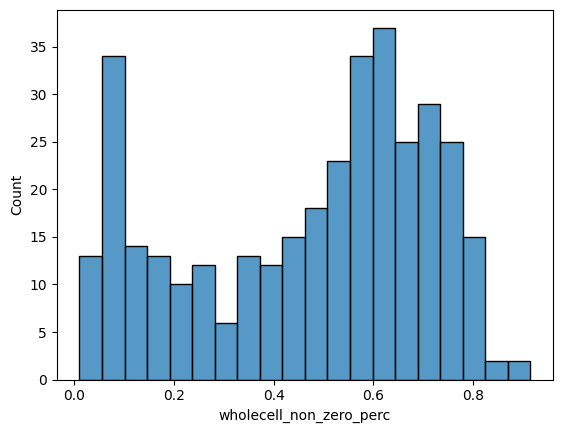

In [71]:
# show the histogram of wholecell_non_zero_perc for the good patches
import matplotlib.pyplot as plt
import seaborn as sns

good_patch_ids = patch_metadata[patch_metadata['is_bad_patch'] == False]['patch_id'].tolist()
good_patches = patch_metadata[patch_metadata['patch_id'].isin(good_patch_ids)]
sns.histplot(good_patches['wholecell_non_zero_perc'], bins=20)

<Axes: xlabel='nuclear_mean', ylabel='Count'>

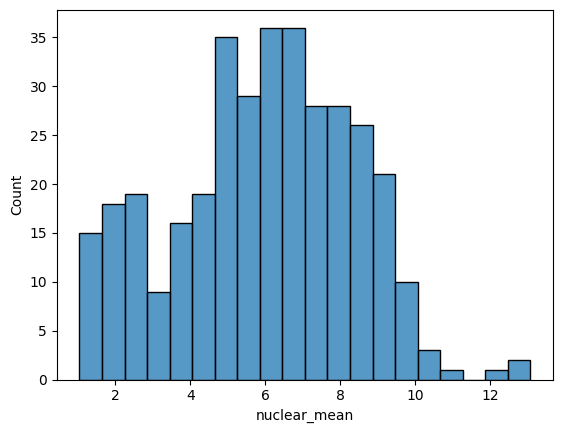

In [72]:
sns.histplot(good_patches['nuclear_mean'], bins=20)

<Axes: xlabel='nuclear_std', ylabel='Count'>

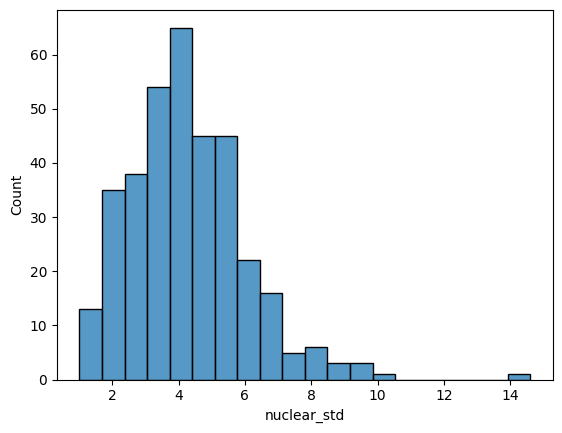

In [73]:
sns.histplot(good_patches['nuclear_std'], bins=20)

In [74]:
# List of all the patch_ids for the good patches with nuclear_mean < 2
good_patches[good_patches['nuclear_mean'] < 1.75]['patch_id'].tolist()

[6,
 103,
 119,
 153,
 189,
 219,
 276,
 329,
 382,
 390,
 407,
 434,
 539,
 572,
 600,
 621,
 634,
 638]

In [75]:
good_patches[good_patches['nuclear_mean'] < 1.75]['patch_id'].tolist()

[6,
 103,
 119,
 153,
 189,
 219,
 276,
 329,
 382,
 390,
 407,
 434,
 539,
 572,
 600,
 621,
 634,
 638]